In [1]:
from pathlib import Path
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
root = Path('data/processed/')

In [36]:
actual_lines = [
    'balance',
    'basic',
    'breakfasts_2x',
    'daily',
    'detox',
    'fit',
    'fit_express',
    'm_fit',
    'power',
    'priem',
    'priem_plus',
    'super_fit'
]

# orders_count

In [26]:
orders_count = pd.read_csv(root / 'orders_count.csv')
orders_count.head(3)

,date,count,product_name,city_id
0,2017-01-01,1,fit,2
1,2017-01-03,144,fit,2
2,2017-01-04,0,fit,2


In [27]:
orders_count.sort_values(by='date', inplace=True)

In [28]:
def make_ticks(dates: pd.Series, ticks_n=10) -> pd.Series:
    if len(dates) < ticks_n:
        return dates

    q = len(dates) // ticks_n
    return dates[dates.index % q == 0]

In [29]:
print('\n'.join([product for product, _ in orders_count.groupby('product_name')]))

balance
balance_trial
basic
bf_pack
breakfasts_2x
cv_light
cv_max
daily
daily plus
daily_trial
detox
dinner
dsv
dsv_breakfasts
dsv_dinners
elementaree_1
fit
fit_express
fit_trial
gf_adidas
m_fit
perekrestok
power
priem
priem_plus
rosneft
samokat
samokat_7
super_detox_1
super_detox_2
super_fit
unifood
vega
фитнес-бар


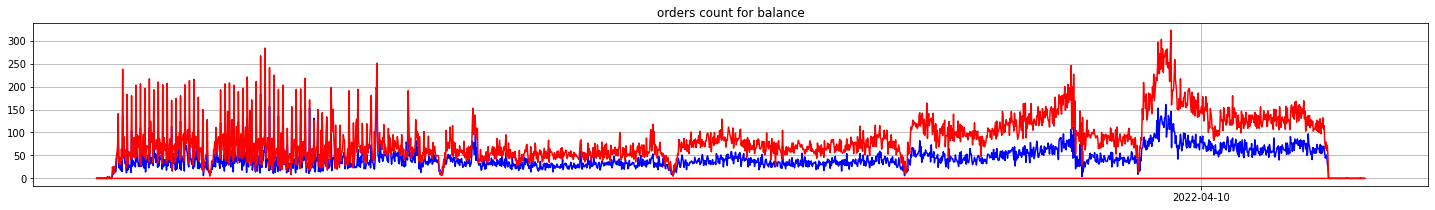

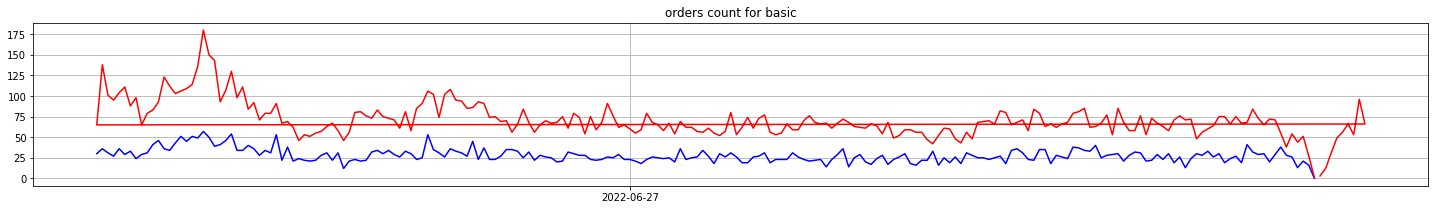

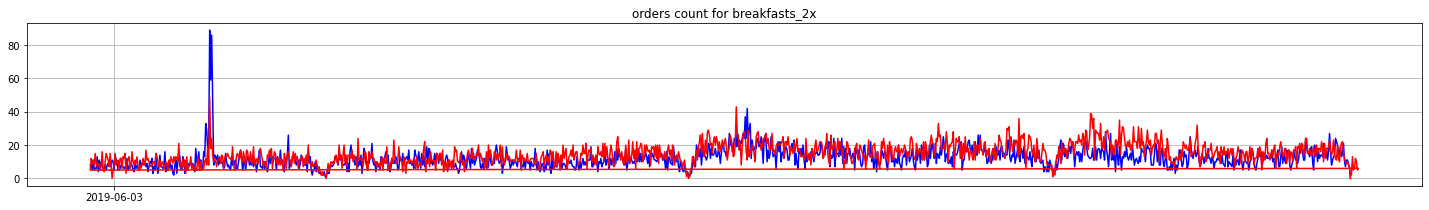

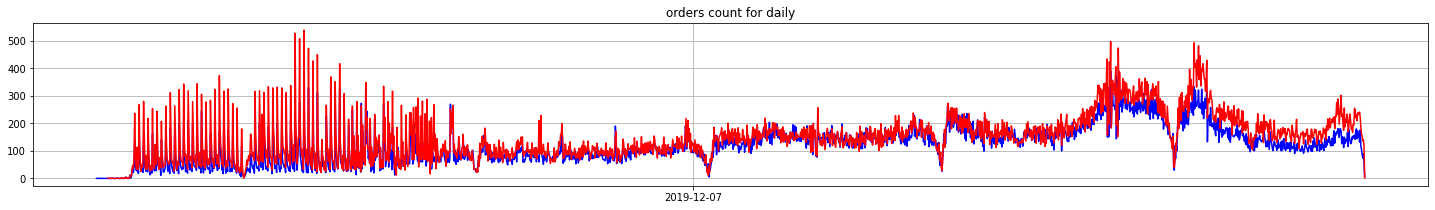

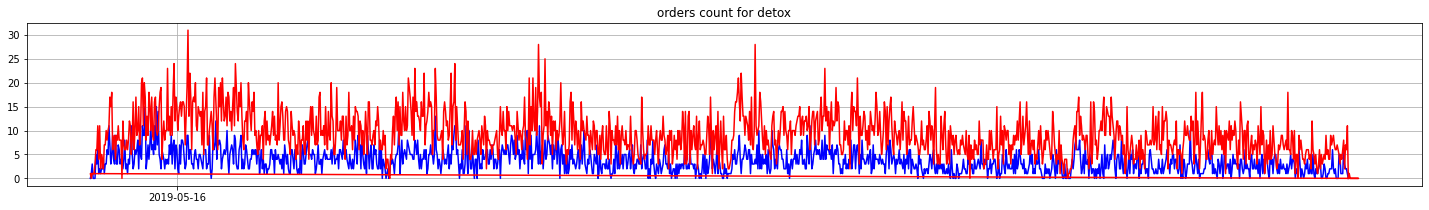

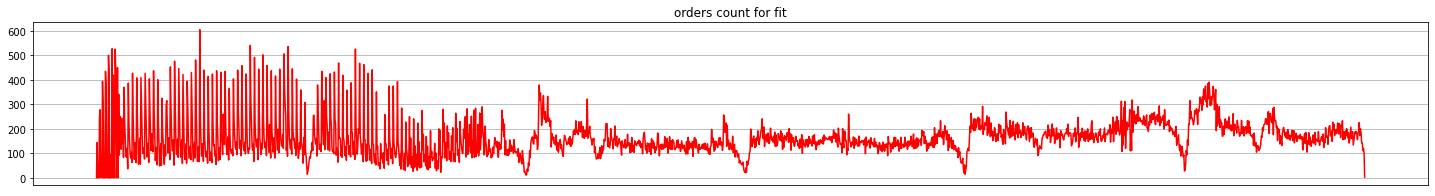

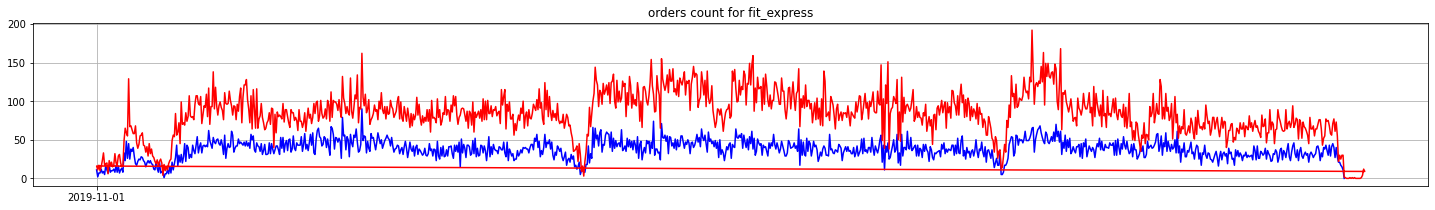

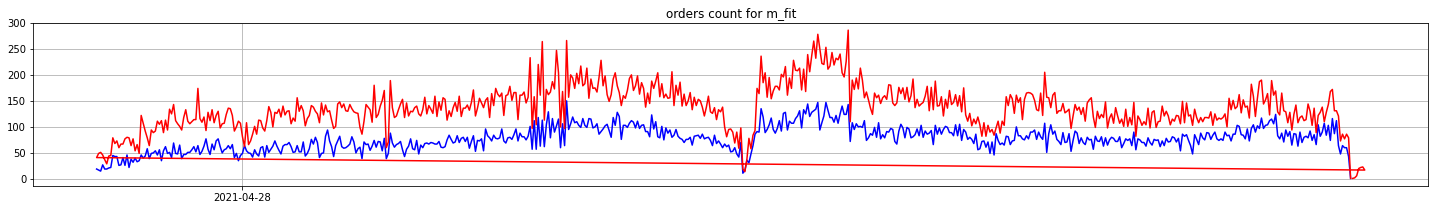

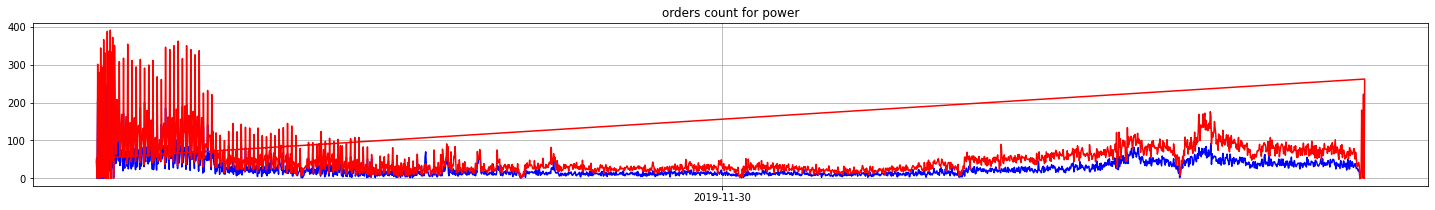

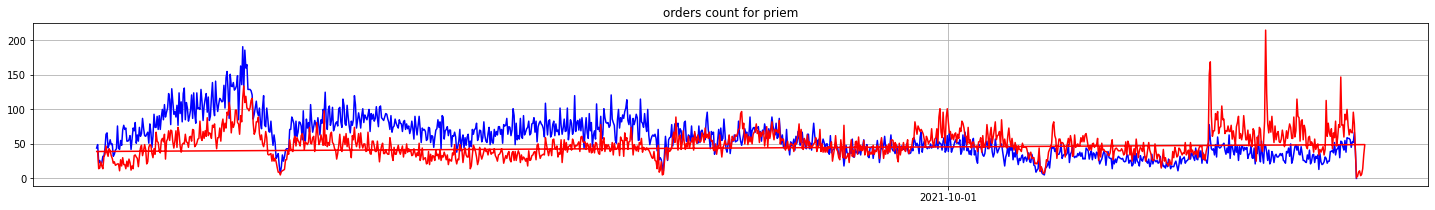

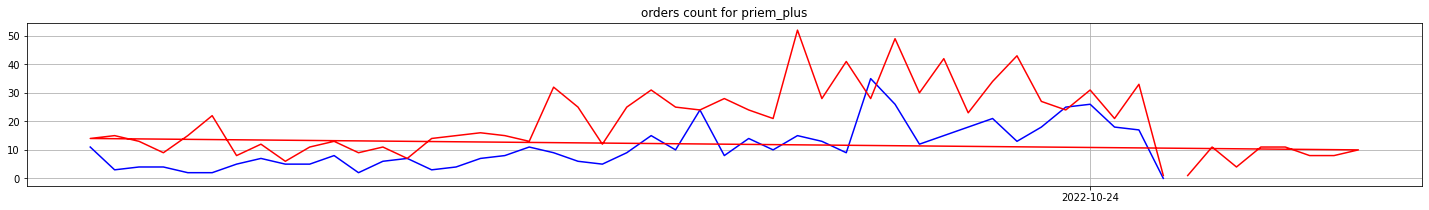

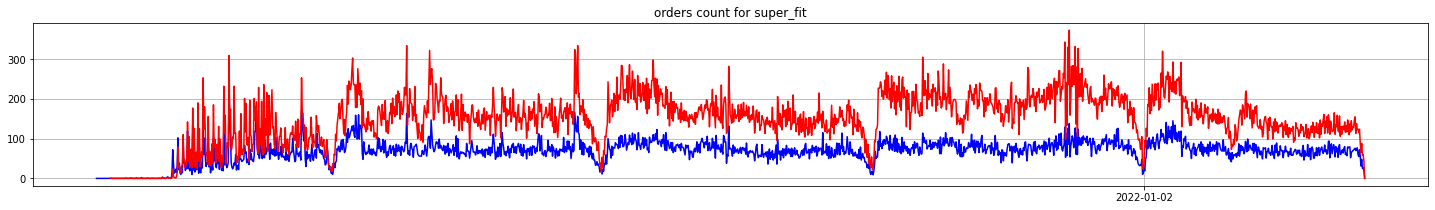

In [37]:
for product, df in orders_count.groupby('product_name'):    
    if product not in actual_lines:
        continue
    
    plt.figure(figsize=(25, 3))
    plt.title(f'orders count for {product}')
    plt.grid(True)
    
    # df = df.sort_values(by='date')
    df_spb = df[df.city_id == 1]
    df_msk = df[df.city_id == 2]
    if len(df_msk) == 0:
        print(f'no data for product {product}')
        continue
    
    plt.plot(df_spb.date, df_spb['count'], c='blue')
    plt.plot(df_msk.date, df_msk['count'], c='red')
    
    plt.xticks(ticks=make_ticks(df_spb.date, ticks_n=1))
    plt.legend(['spb', 'msk'])
    
    plt.show()

# new_orders_count

In [20]:
new_orders_count = pd.read_csv(root / 'new_orders_count.csv')
new_orders_count.head(3)

,date,count,product_name,city_id
0,2017-01-03,22,fit,2
1,2017-01-04,0,fit,2
2,2017-01-06,4,fit,2


In [21]:
new_orders_count.sort_values(by='date', inplace=True)

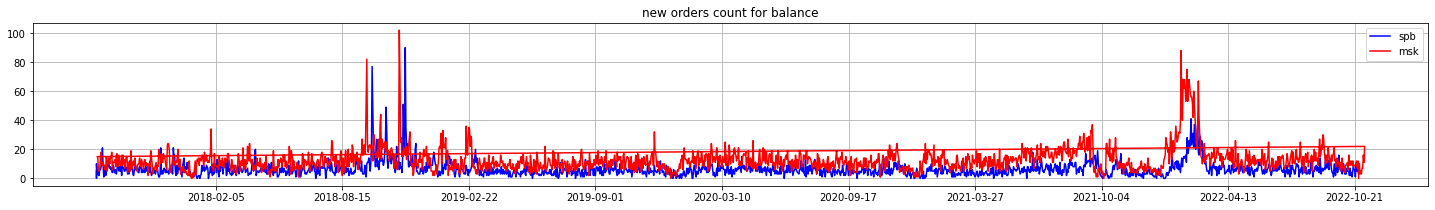

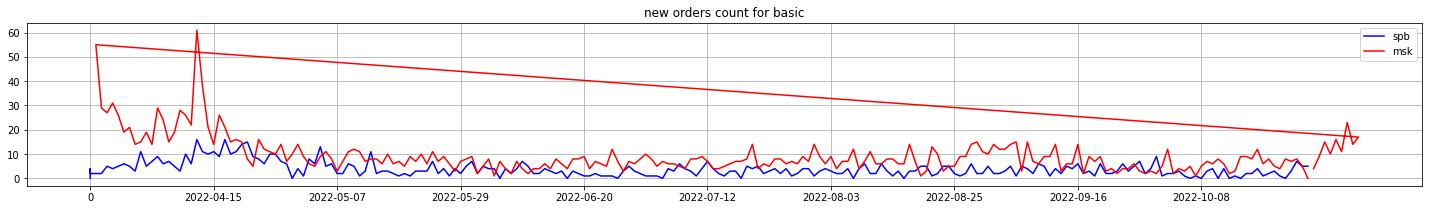

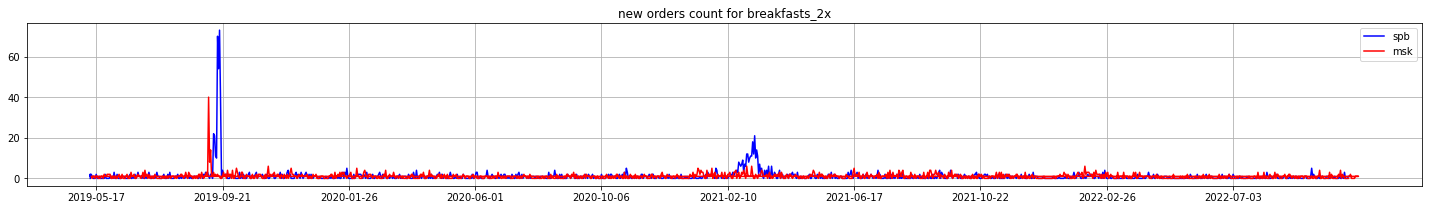

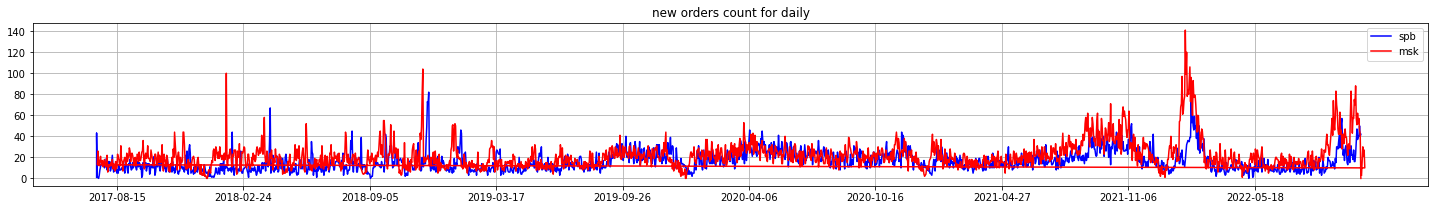

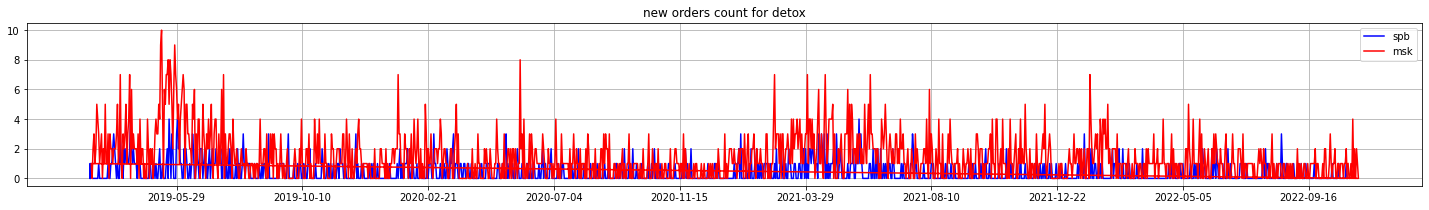

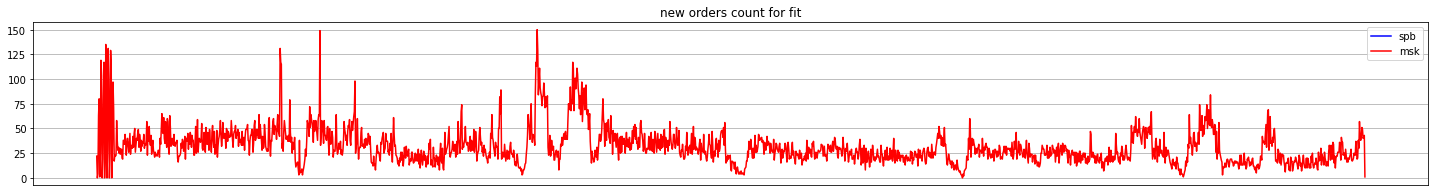

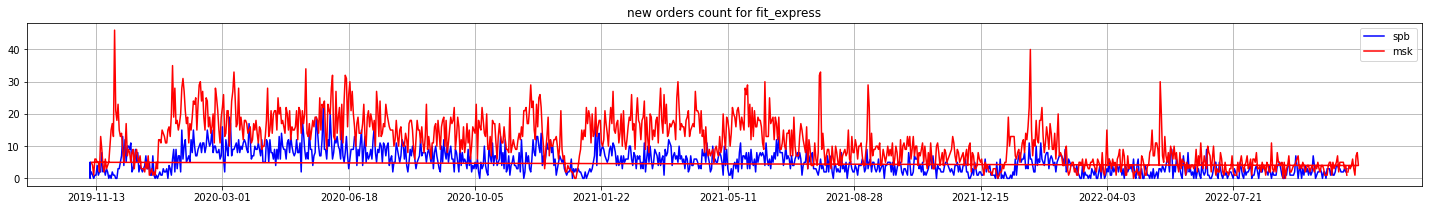

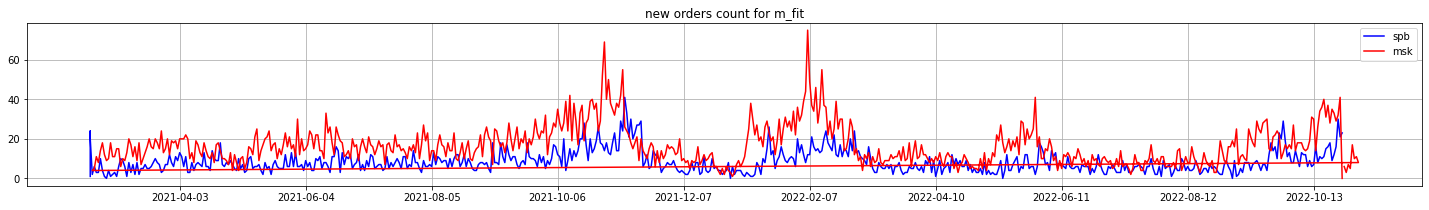

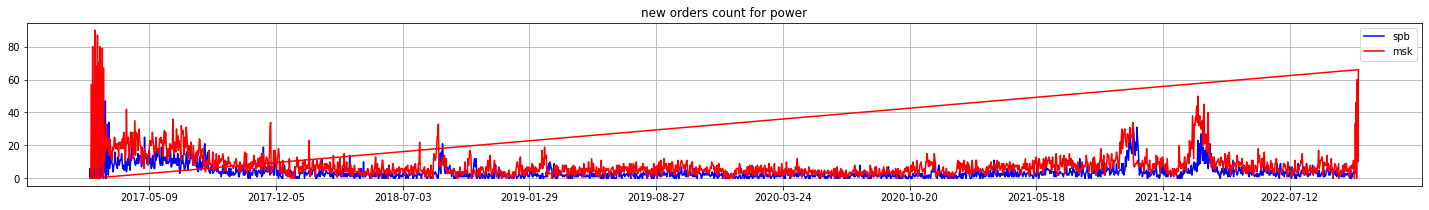

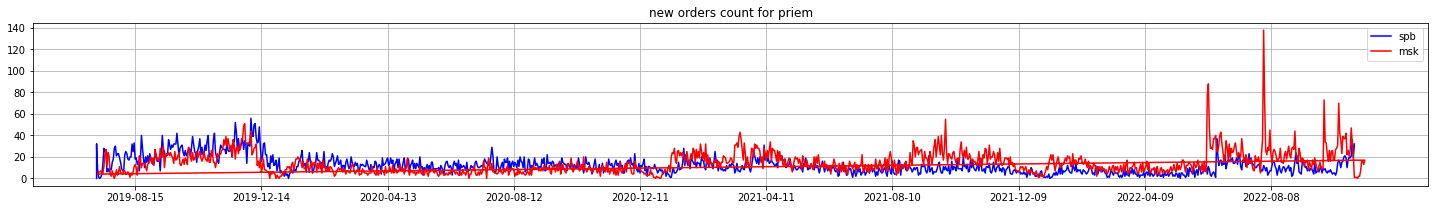

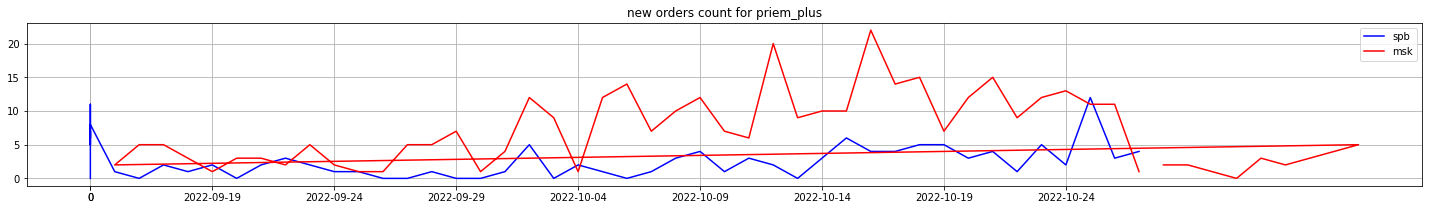

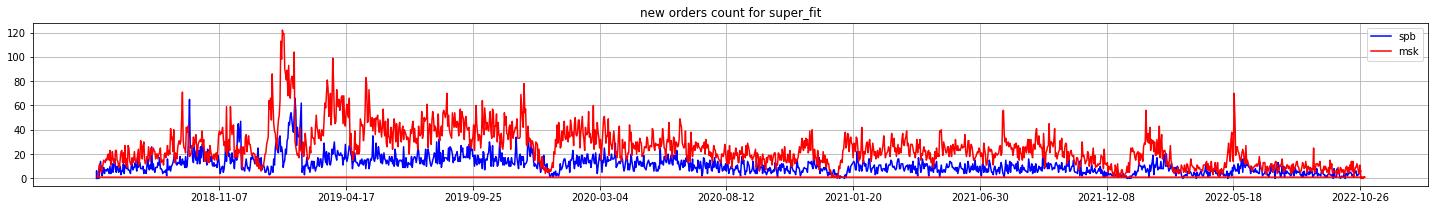

In [39]:
for product, df in new_orders_count.groupby('product_name'):    
    if product not in actual_lines:
        continue

    plt.figure(figsize=(25, 3))
    plt.title(f'new orders count for {product}')
    plt.grid(True)
    
    df_spb = df[df.city_id == 1]
    df_msk = df[df.city_id == 2]
    if len(df_msk) == 0:
        print(f'no data for spb product {product}')
    else:
        plt.plot(df_spb.date, df_spb['count'], c='blue')
    
    
    if len(df_msk) == 0:
        print(f'no data for msk product {product}')
    else:
        plt.plot(df_msk.date, df_msk['count'], c='red')
    
    plt.xticks(ticks=make_ticks(df_spb.date, ticks_n=10))
    plt.legend(['spb', 'msk'])
    
    plt.show()